# Import Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Import and Preview Data

In [233]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Analyze the Data

In [234]:
df.shape

(14999, 10)

In [235]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [237]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [238]:
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [239]:
df.memory_usage(deep=True)

Index                       132
satisfaction_level       119992
last_evaluation          119992
number_project           119992
average_montly_hours     119992
time_spend_company       119992
Work_accident            119992
left                     119992
promotion_last_5years    119992
sales                    955207
salary                   920515
dtype: int64

In [240]:
# filter out and extract the column names with int64 data type
df_int64 = df.select_dtypes(include=['int64'])
int_64_cols = df_int64.columns.tolist()
int_64_cols

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [241]:
df[int_64_cols] = df[int_64_cols].astype('int16')

In [242]:
df.memory_usage(deep=True)

Index                       132
satisfaction_level       119992
last_evaluation          119992
number_project            29998
average_montly_hours      29998
time_spend_company        29998
Work_accident             29998
left                      29998
promotion_last_5years     29998
sales                    955207
salary                   920515
dtype: int64

In [243]:
# filter out and extract the column names with float64 data type
df_float64 = df.select_dtypes(include=['float64'])
float_64_cols = df_float64.columns.tolist()
float_64_cols

['satisfaction_level', 'last_evaluation']

In [244]:
df[float_64_cols] = df[float_64_cols].astype('float32')

In [245]:
df.memory_usage(deep=True)

Index                       132
satisfaction_level        59996
last_evaluation           59996
number_project            29998
average_montly_hours      29998
time_spend_company        29998
Work_accident             29998
left                      29998
promotion_last_5years     29998
sales                    955207
salary                   920515
dtype: int64

In [246]:
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


# Determine the Relationship between Variables

In [247]:
# Correlation matrix to see the relationships between variables
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

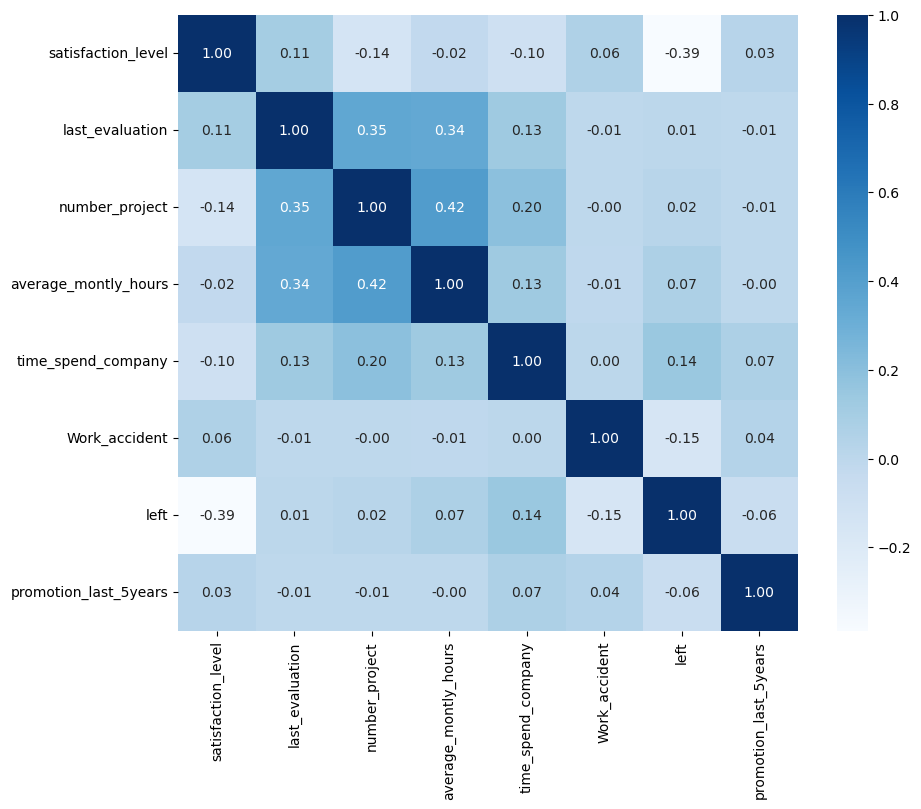

In [248]:
# Visualizations
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues")

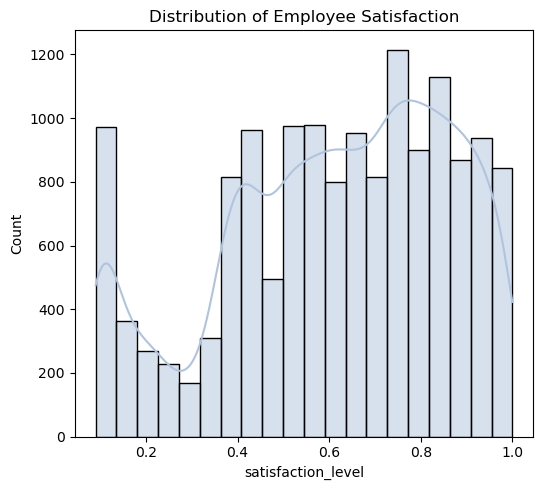

In [249]:
# Now, let's draw the distribution plots for Employee Satisfaction
plt.figure(figsize=(15, 5))

# Distribution of Employee Satisfaction
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, bins=20, color = "lightsteelblue", lw=1)
plt.title('Distribution of Employee Satisfaction')

# Show the plots
plt.tight_layout()
plt.show()


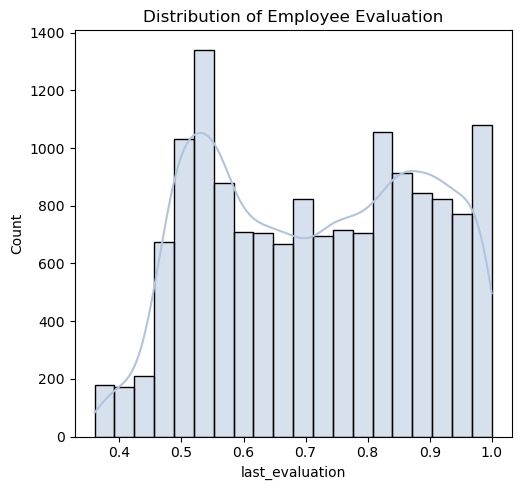

In [250]:
# Now, let's draw the distribution plots for Employee Evaluation
plt.figure(figsize=(15, 5))

# Distribution of Employee Evaluation
plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'], kde=True, bins=20, color = "lightsteelblue", lw=1)
plt.title('Distribution of Employee Evaluation')

# Show the plot
plt.tight_layout()
plt.show()


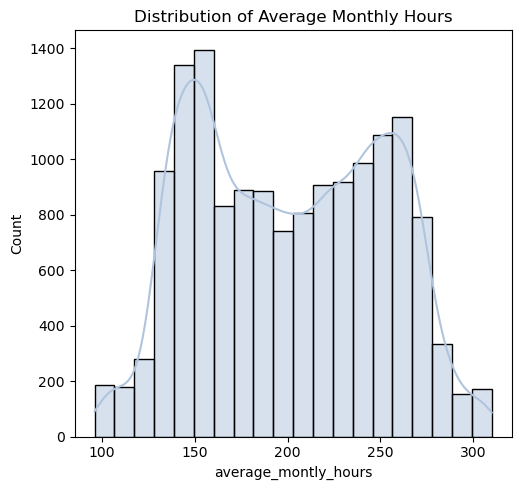

In [251]:
# Now, let's draw the distribution plots for Employee Average Monthly Hours
plt.figure(figsize=(15, 5))

# Distribution of Employee Average Monthly Hours
plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], kde=True, bins=20, color = "lightsteelblue", lw=1)
plt.title('Distribution of Average Monthly Hours')

# Show the plot
plt.tight_layout()
plt.show()


In [252]:
#identify categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['sales', 'salary']

In [253]:
salary_pivot = pd.pivot_table(df[['salary','satisfaction_level','average_montly_hours']],index='salary')
salary_pivot

,average_montly_hours,satisfaction_level
salary,,
high,199.867421,0.637470
low,200.996583,0.600753
medium,201.338349,0.621817


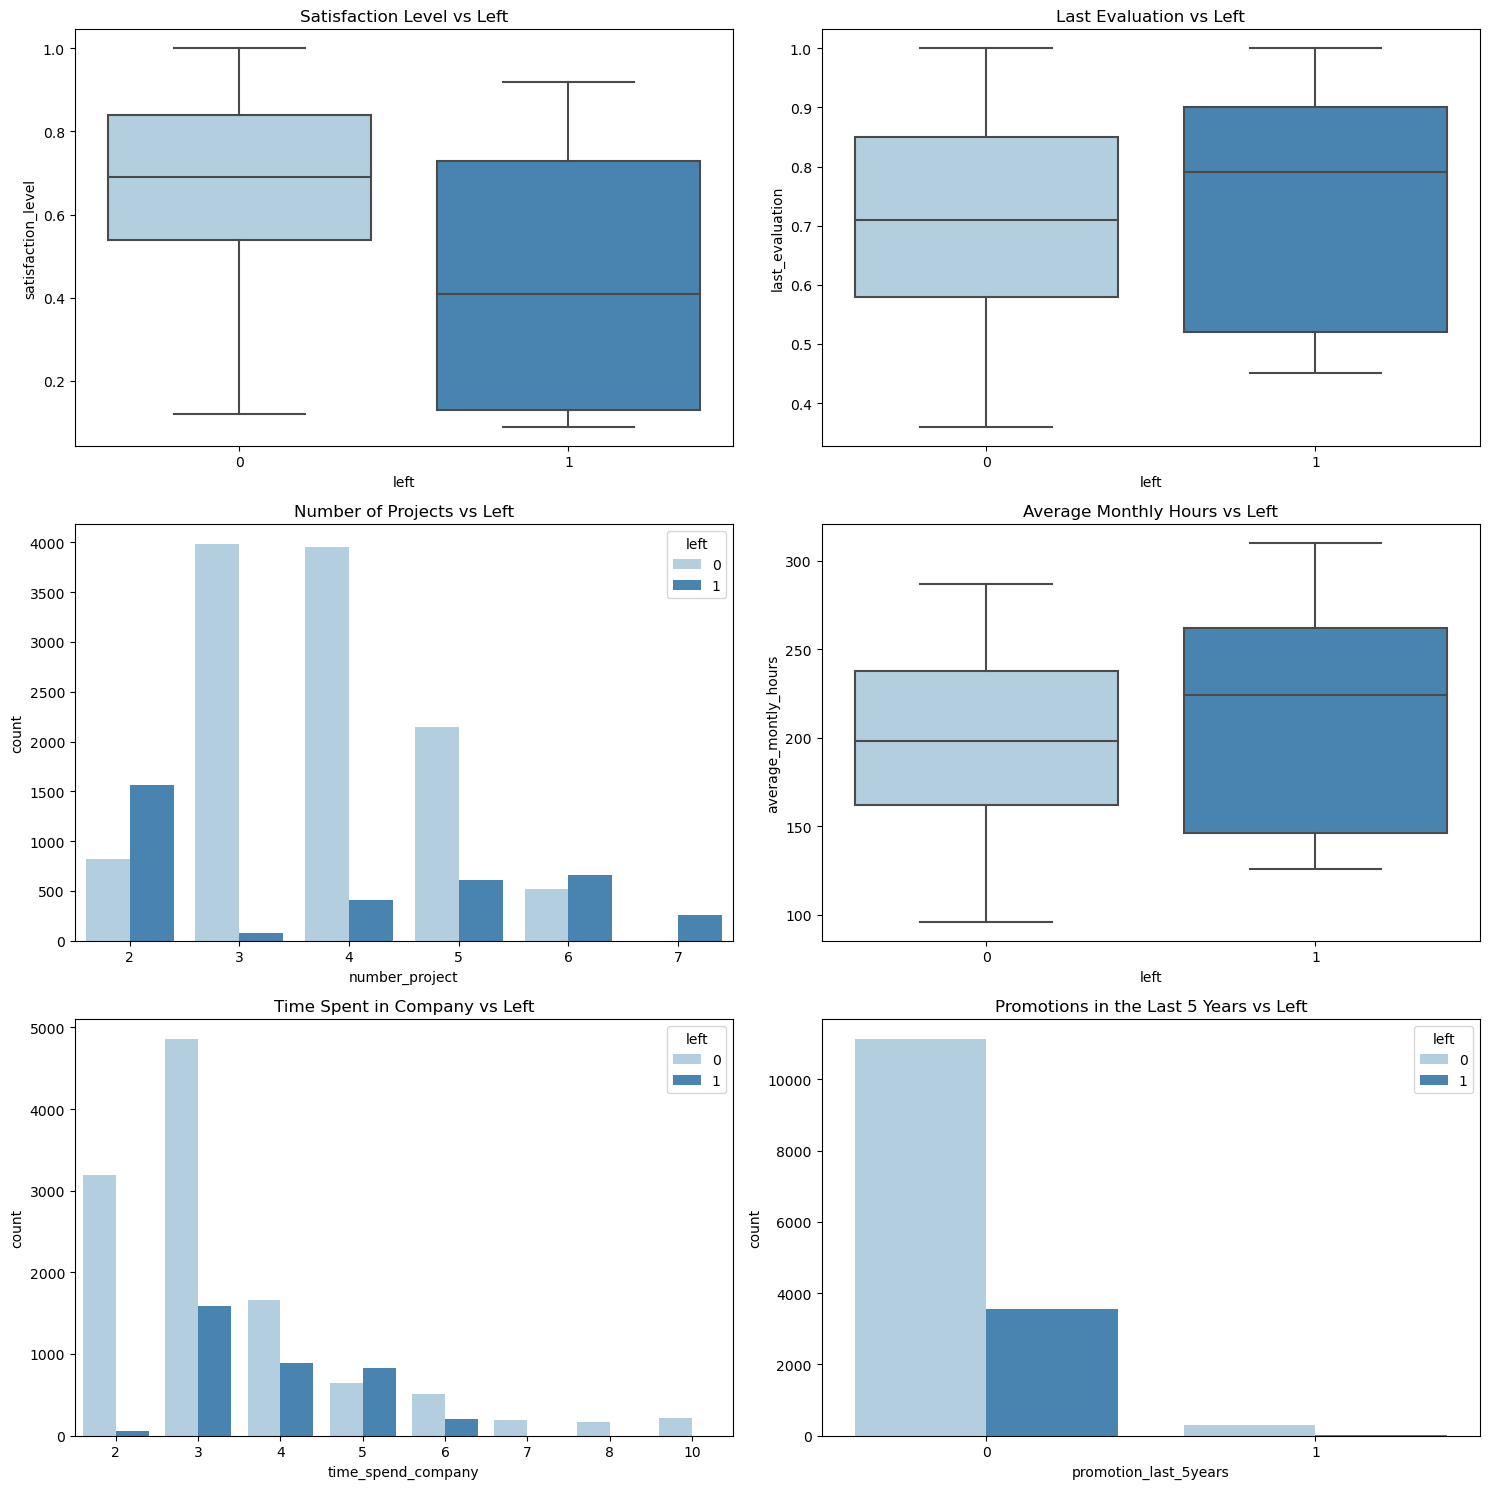

In [254]:
# Setting up the visualizations
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax = ax.ravel()  # Ravel turns a matrix into a flat array, for easy iteration

# Satisfaction Level vs Left
sns.boxplot(x='left', y='satisfaction_level', data=df, ax=ax[0], palette="Blues")
ax[0].set_title('Satisfaction Level vs Left')

# Last Evaluation vs Left
sns.boxplot(x='left', y='last_evaluation', data=df, ax=ax[1], palette="Blues")
ax[1].set_title('Last Evaluation vs Left')

# Number of Projects vs Left
sns.countplot(x='number_project', hue='left', data=df, ax=ax[2], palette="Blues")
ax[2].set_title('Number of Projects vs Left')

# Average Monthly Hours vs Left
sns.boxplot(x='left', y='average_montly_hours', data=df, ax=ax[3], palette="Blues")
ax[3].set_title('Average Monthly Hours vs Left')

# Time Spent in Company vs Left
sns.countplot(x='time_spend_company', hue='left', data=df, ax=ax[4], palette="Blues")
ax[4].set_title('Time Spent in Company vs Left')

# Promotions in the Last 5 Years vs Left
sns.countplot(x='promotion_last_5years', hue='left', data=df, ax=ax[5], palette="Blues")
ax[5].set_title('Promotions in the Last 5 Years vs Left')

# Adjust the layout
plt.tight_layout()

# Determine KMeans Clusters

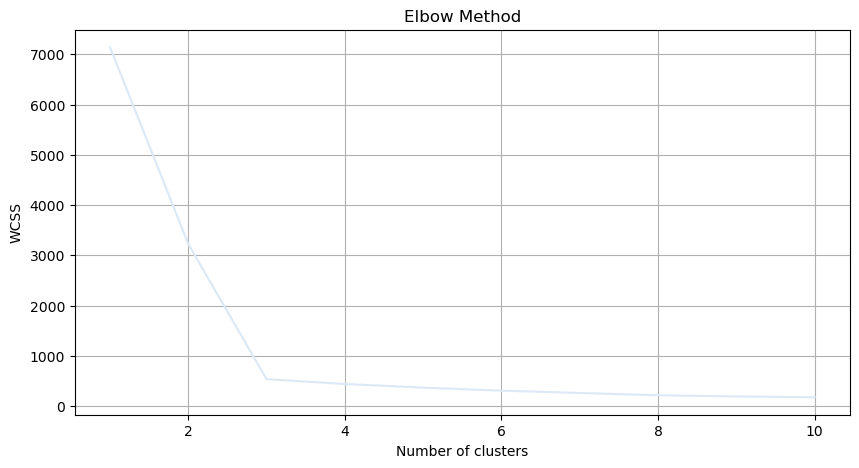

In [255]:
# Filter the data for employees who have left the company
left_employees = df[df['left'] == 1]

# Selecting the features to be used for clustering
features_for_clustering = left_employees[['satisfaction_level', 'last_evaluation']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.grid(True)
plt.show()


In [256]:
# Assuming you have a DataFrame 'employees_who_left' with the relevant data
X = left_employees[['satisfaction_level', 'last_evaluation']].values

# It's a good practice to scale the features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model
model = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the model and predict the cluster labels
y_kmeans = model.fit_predict(X_scaled)

# Now y_kmeans contains the cluster labels assigned to each data point
left_employees['cluster'] = y_kmeans

/Users/lisareedpreston/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/qx/ttmh7pmn68bd7l3trfk_6qrw0000gn/T/ipykernel_31261/2743738124.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = y_kmeans


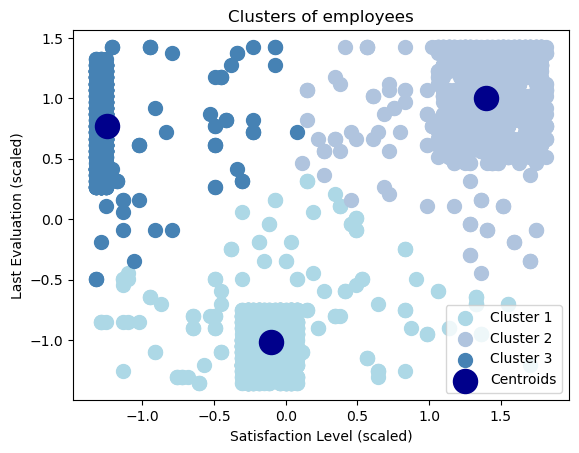

In [257]:
# Plotting the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='lightblue', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='lightsteelblue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='steelblue', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='darkblue', label='Centroids')

plt.title('Clusters of employees')
plt.xlabel('Satisfaction Level (scaled)')
plt.ylabel('Last Evaluation (scaled)')
plt.legend()
plt.show()

In [261]:
print(X.shape)
print(y.shape)

(3571, 2)
(14999,)


In [264]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


# Machine Learning Models: Logistic Regression

In [267]:
# List of feature columns - replace these with the actual names of your feature columns
feature_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Name of the target column - replace with the actual name of your target column
target_column = 'left'  

# Selecting the features and target from the DataFrame
X = df[feature_columns]
y = df[target_column]

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize and apply SMOTE
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [268]:
# Encoding categorical variables
label_encoders = {}
for column in ['sales', 'salary']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


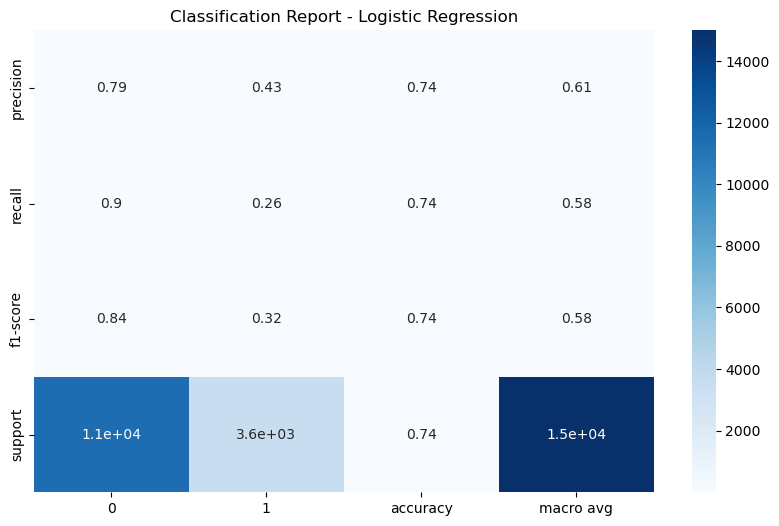

In [269]:
# Separate features and target variable
X = df.drop('left', axis=1)
y = df['left']

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(log_reg, X, y, cv=cv)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)

# Convert the classification report to a DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(report_df).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report - Logistic Regression")
plt.show()

In [270]:
# Perform 5-Fold Cross-Validation to evaluate accuracy
cv_scores = cross_val_score(gb_clf, X_transformed, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()

mean_accuracy, std_deviation

(0.9735310881404912, 0.004132945660104679)

# Machine Learning Models: Random Forest Classifier

In [271]:
# Initialize the classifier
classifier = RandomForestClassifier(random_state=123)

# Train the classifier on the resampled data
classifier.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = classifier.predict(X_test)

In [272]:
y_pred_probs = classifier.predict_proba(X_test)[:, 1]  # Correct for binary classification


# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Now you can print or use the roc_auc variable
print(f'ROC AUC (One-vs-Rest): {roc_auc}')



# Predictions (as class labels) for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'ROC AUC (One-vs-Rest): {roc_auc}')


ROC AUC (One-vs-Rest): 0.9965099220042369
Accuracy: 0.9923333333333333
Confusion Matrix:
[[2281   10]
 [  13  696]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC (One-vs-Rest): 0.9965099220042369


In [280]:
# Initialize your classifier
classifier = RandomForestClassifier(random_state=123)

# Define number of folds
k = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=123)

# Assuming X and y are your features and labels
# Perform k-fold cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=skf, scoring='accuracy')  # You can change 'accuracy' to another metric

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold: {cv_scores}')

# Calculate the average and standard deviation of the scores
print(f'Average score: {cv_scores.mean()}')
print(f'Standard deviation of scores: {cv_scores.std()}')


Cross-validation scores for each fold: [0.99533333 0.993      0.99233333 0.99       0.99199733]
Average score: 0.9925327998221629
Standard deviation of scores: 0.0017206307614123374


# Machine Learning Models: Gradient Boosting Classifier

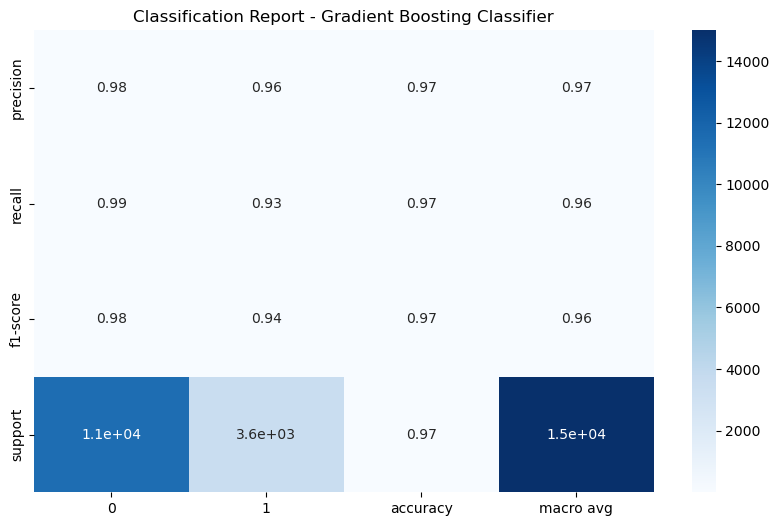

In [274]:
# One-hot encoding for categorical columns
categorical_columns = ['sales', 'salary']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)
X_transformed = preprocessor.fit_transform(X)

# Initialize Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier()

# Perform 5-Fold Cross-Validation with the Gradient Boosting Classifier
y_pred_gb = cross_val_predict(gb_clf, X_transformed, y, cv=StratifiedKFold(n_splits=5))

# Generate classification report for Gradient Boosting Classifier
gb_report = classification_report(y, y_pred_gb, output_dict=True)

# Convert the classification report to a DataFrame for easier plotting
gb_report_df = pd.DataFrame(gb_report).transpose()

# Plotting the classification report for Gradient Boosting Classifier
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(gb_report_df).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report - Gradient Boosting Classifier")
plt.show()

# Machine Learning Models: KNeighbors Classifier

In [275]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Check the model's accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2184  107]
 [  51  658]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2291
           1       0.86      0.93      0.89       709

    accuracy                           0.95      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [276]:
# Define the number of folds for K-Fold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

# Find Standard Deviation
std_dev_cv_score = np.std(cv_scores)

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold: {cv_scores}')

# Calculate the average score
print(f'Average cross-validation score: {np.mean(cv_scores)}')

# Print the Standard Deviation
print(f'Standard deviation of cross-validation scores: {std_dev_cv_score}')

Cross-validation scores for each fold: [0.93066667 0.93133333 0.93033333 0.93333333 0.93131044]
Average cross-validation score: 0.9313954206957875
Standard deviation of cross-validation scores: 0.0010417000040547865


# Categorize Risk Levels

In [277]:
# Categorizing employees into different zones based on turnover probability
turnover_df['Risk Zone'] = pd.cut(turnover_df['Turnover Probability'],
                                  bins=[-0.01, 0.2, 0.6, 0.9, 1.0],
                                  labels=['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 
                                          'Medium Risk Zone (Orange)', 'High Risk Zone (Red)'])

# Count the number of employees in each zone
zone_counts = turnover_df['Risk Zone'].value_counts().sort_index()

zone_counts


Risk Zone
Safe Zone (Green)            2266
Low Risk Zone (Yellow)         43
Medium Risk Zone (Orange)      50
High Risk Zone (Red)          641
Name: count, dtype: int64

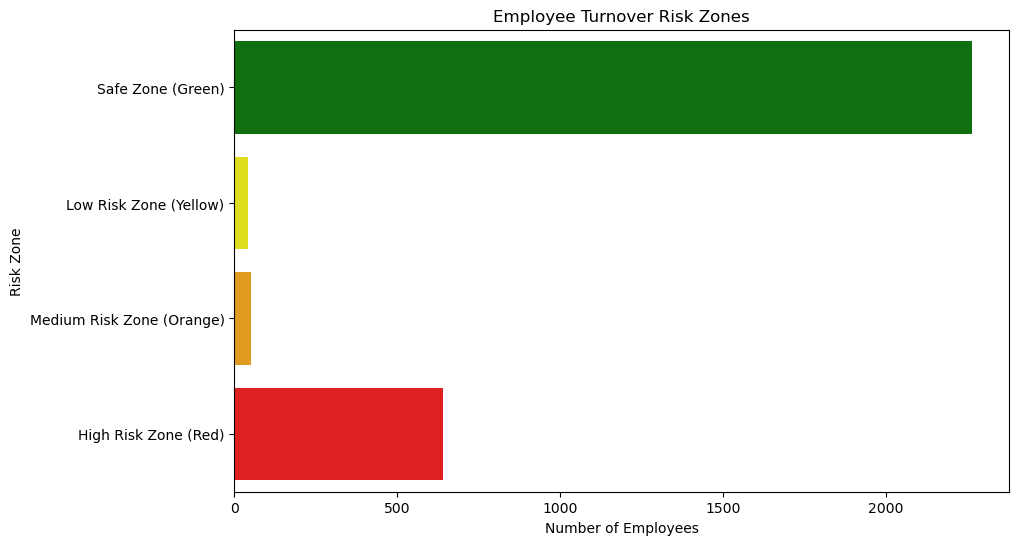

In [278]:
# Visualization for the zones
plt.figure(figsize=(10, 6))
sns.countplot(y=turnover_df['Risk Zone'], order=['Safe Zone (Green)', 'Low Risk Zone (Yellow)', 
                                                 'Medium Risk Zone (Orange)', 'High Risk Zone (Red)'],
              palette=['green', 'yellow', 'orange', 'red'])
plt.title("Employee Turnover Risk Zones")
plt.xlabel("Number of Employees")
plt.ylabel("Risk Zone")
plt.show()


# Conclusions

After evaluating multiple ML models, the most effective ML model for this task is the Random Forest Classifier.  The employees have been categorized into four zones based on their turnover probability scores:

1. **Safe Zone (Green):** Less than 20% probability of turnover - 3,402 employees
2. **Low Risk Zone (Yellow):** 20% to 60% probability of turnover - 82 employees
3. **Medium Risk Zone (Orange):** 60% to 90% probability of turnover - 98 employees
4. **High Risk Zone (Red):** More than 90% probability of turnover - 918 employees

Retention strategies for each zone could be as follows:

1. **Safe Zone (Green):** Continue with current HR strategies, as these employees are likely content. Regular check-ins and maintaining current benefits and work culture are crucial.
2. **Low Risk Zone (Yellow):** Implement engagement strategies. Conduct surveys or interviews to understand their concerns. Offer professional development opportunities and potentially more flexible work conditions to increase their satisfaction and engagement.
3. **Medium Risk Zone (Orange):** Actively intervene with personalized retention strategies. This could include one-on-one meetings to address specific grievances, more significant career development opportunities, competitive salary adjustments, or recognition programs.
4. **High Risk Zone (Red):** Immediate and focused retention efforts are necessary. This may involve reevaluating their work conditions, roles, compensation, and career paths. Consider offering retention bonuses, significant role changes, or promotions if warranted. A key focus should be on understanding why their turnover probability is high and addressing those specific issues.

Each of these strategies should be tailored to the individual needs and concerns of the employees within each zone, based on detailed analysis and understanding of their specific situations.
